# Part I: Sentiment analysis using LSTM 
In this part, we perform a sentiment analysis using LSTM model. The final (improved) model should achieve a test accuracy of greater than 75%.

## Step 1: Data exploration and preprocessing

1. Load your chosen dataset and print the main statistics

In [1]:
!pip install pandas numpy matplotlib seaborn torch scikit-learn spacy tiktoken wordcloud

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/Users/sashi/Desktop/DL/assignment2/.env/lib/python3.10/site-packages/numpy-2.2.6.dist-info/METADATA'

You should consider upgrading via the '/Users/sashi/Desktop/DL/assignment2/.env/bin/python -m pip install --upgrade pip' command.


In [2]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 1.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/sashi/Desktop/DL/assignment2/.env/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
!pip install --force-reinstall --no-cache-dir numpy
!pip install --force-reinstall --no-cache-dir --upgrade --ignore-installed scipy pandas scikit-learn torch

     |████████████████████████████████| 5.3 MB 1.4 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
ERROR: Cannot uninstall numpy 2.2.6, RECORD file not found. You might be able to recover from this via: 'pip install --force-reinstall --no-deps numpy==2.2.6'.
You should consider upgrading via the '/Users/sashi/Desktop/DL/assignment2/.env/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 22.4 MB 37.7 MB/s eta 0:00:01
     |████████████████████████████████| 10.8 MB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 10.7 MB 40.0 MB/s eta 0:00:01
     |████████████████████████████████| 68.6 MB 68.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 14.6 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 17.3 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 43.3 MB/s eta 0:00:01
     |██████

In [4]:
!pip install --upgrade pybind11

You should consider upgrading via the '/Users/sashi/Desktop/DL/assignment2/.env/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
You should consider upgrading via the '/Users/sashi/Desktop/DL/assignment2/.env/bin/python -m pip install --upgrade pip' command.


In [ ]:

import numpy as np 
import pandas as pd


df = pd.read_csv('./data/Tweets.csv')
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


2. Print the first 5 rows of the dataset to understand its structure

In [ ]:

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


3. Provide a brief description of the dataset

The Twitter US Airline Sentiment dataset contains tweets directed at major U.S. airlines, manually labeled for sentiment analysis. It is commonly used to train and evaluate sentiment classification models in NLP tasks.

- Source: Tweets collected via Twitter API in February 2015.

- Size: 14,874 tweets.

- Target Variable:

    - airline_sentiment: Sentiment label – positive, neutral, or negative.

- Class Distribution (imbalanced):

    - Negative (~63%)

    - Neutral (~21%)

    - Positive (~16%)

- Text Field:

    - text: The actual tweet content.

- Additional Features:

    - airline: Name of the airline the tweet is about.

    - negativereason: If negative, the specific reason (e.g., “Late Flight”, “Customer Service Issue”).

    - tweet_created: Timestamp of the tweet.

    - tweet_location: Optional user location data.

4. Display descriptive statistics

DESCRIPTIVE STATISTICS
Number of samples: 14,640

------------------------------
CLASS DISTRIBUTION
------------------------------
Negative: 9,178 samples (62.7%)
Neutral: 3,099 samples (21.2%)
Positive: 2,363 samples (16.1%)

------------------------------
REVIEW LENGTH STATISTICS
------------------------------
Average review length: 17.7 words, 103.8 characters
Median review length: 19.0 words, 114.0 characters
Min review length: 2 words, 12 characters
Max review length: 36 words, 186 characters

------------------------------
VOCABULARY STATISTICS
------------------------------
Vocabulary size (unique words): 16,704
Total words in dataset: 256,202
Average words per tweet: 17.5

Top 10 most common words:
  'to': 8,641 times
  'the': 6,050 times
  'i': 5,373 times
  'a': 4,477 times
  'united': 4,143 times
  'you': 4,109 times
  'for': 3,992 times
  'flight': 3,873 times
  'on': 3,778 times
  'and': 3,709 times

------------------------------
STATISTICS BY SENTIMENT
------------------

/var/folders/j0/f6ly3q3105d1r3kmyc5cjr2c0000gn/T/ipykernel_30170/3379051030.py:121: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sentiment_word_counts, labels=df['airline_sentiment'].unique())
/var/folders/j0/f6ly3q3105d1r3kmyc5cjr2c0000gn/T/ipykernel_30170/3379051030.py:128: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(sentiment_char_counts, labels=df['airline_sentiment'].unique())


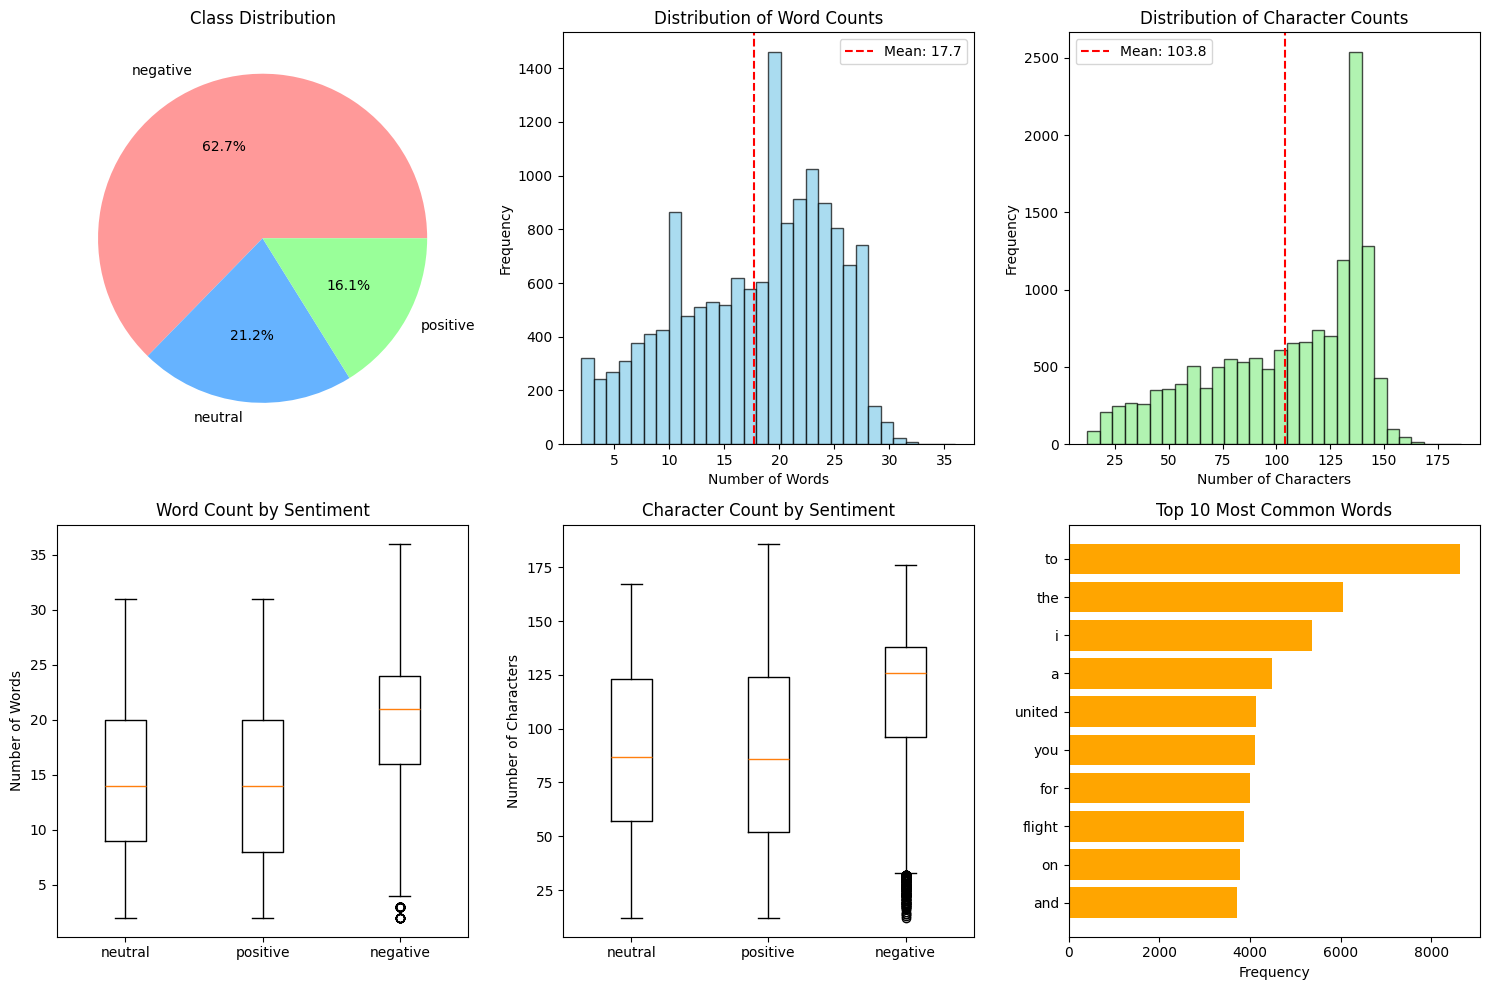

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
import re

# 1. Number of samples
print("=" * 50)
print("DESCRIPTIVE STATISTICS")
print("=" * 50)
print(f"Number of samples: {len(df):,}")

# 2. Class distribution (percentage of positive, negative, neutral reviews)
print("\n" + "-" * 30)
print("CLASS DISTRIBUTION")
print("-" * 30)
sentiment_counts = df['airline_sentiment'].value_counts()
sentiment_percentages = df['airline_sentiment'].value_counts(normalize=True) * 100

for sentiment in sentiment_counts.index:
    count = sentiment_counts[sentiment]
    percentage = sentiment_percentages[sentiment]
    print(f"{sentiment.capitalize()}: {count:,} samples ({percentage:.1f}%)")

# 3. Average review length (in words and characters)
print("\n" + "-" * 30)
print("REVIEW LENGTH STATISTICS")
print("-" * 30)

# Calculate word and character counts for each tweet
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

avg_words = df['word_count'].mean()
avg_chars = df['char_count'].mean()
median_words = df['word_count'].median()
median_chars = df['char_count'].median()

print(f"Average review length: {avg_words:.1f} words, {avg_chars:.1f} characters")
print(f"Median review length: {median_words:.1f} words, {median_chars:.1f} characters")
print(f"Min review length: {df['word_count'].min()} words, {df['char_count'].min()} characters")
print(f"Max review length: {df['word_count'].max()} words, {df['char_count'].max()} characters")

# 4. Vocabulary size (number of unique words)
print("\n" + "-" * 30)
print("VOCABULARY STATISTICS")
print("-" * 30)

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Convert to lowercase and remove special characters
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    # Split into words and remove empty strings
    words = [word for word in text.split() if word.strip()]
    return words

# Get all words from all tweets
all_words = []
for text in df['text']:
    all_words.extend(clean_and_tokenize(text))

# Calculate vocabulary statistics
unique_words = set(all_words)
vocab_size = len(unique_words)
total_words = len(all_words)

print(f"Vocabulary size (unique words): {vocab_size:,}")
print(f"Total words in dataset: {total_words:,}")
print(f"Average words per tweet: {total_words / len(df):.1f}")

# Most common words
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(10)
print(f"\nTop 10 most common words:")
for word, count in most_common_words:
    print(f"  '{word}': {count:,} times")

# Additional statistics by sentiment
print("\n" + "-" * 30)
print("STATISTICS BY SENTIMENT")
print("-" * 30)

for sentiment in df['airline_sentiment'].unique():
    sentiment_df = df[df['airline_sentiment'] == sentiment]
    avg_words_sentiment = sentiment_df['word_count'].mean()
    avg_chars_sentiment = sentiment_df['char_count'].mean()
    print(f"{sentiment.capitalize()} tweets:")
    print(f"  Average length: {avg_words_sentiment:.1f} words, {avg_chars_sentiment:.1f} characters")
    print(f"  Count: {len(sentiment_df):,} tweets")

# Create visualizations
plt.figure(figsize=(15, 10))

# 1. Class distribution pie chart
plt.subplot(2, 3, 1)
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Class Distribution')

# 2. Word count distribution
plt.subplot(2, 3, 2)
plt.hist(df['word_count'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.axvline(avg_words, color='red', linestyle='--', label=f'Mean: {avg_words:.1f}')
plt.legend()

# 3. Character count distribution
plt.subplot(2, 3, 3)
plt.hist(df['char_count'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Character Counts')
plt.axvline(avg_chars, color='red', linestyle='--', label=f'Mean: {avg_chars:.1f}')
plt.legend()

# 4. Word count by sentiment
plt.subplot(2, 3, 4)
sentiment_word_counts = [df[df['airline_sentiment'] == sentiment]['word_count'] for sentiment in df['airline_sentiment'].unique()]
plt.boxplot(sentiment_word_counts, labels=df['airline_sentiment'].unique())
plt.ylabel('Number of Words')
plt.title('Word Count by Sentiment')

# 5. Character count by sentiment
plt.subplot(2, 3, 5)
sentiment_char_counts = [df[df['airline_sentiment'] == sentiment]['char_count'] for sentiment in df['airline_sentiment'].unique()]
plt.boxplot(sentiment_char_counts, labels=df['airline_sentiment'].unique())
plt.ylabel('Number of Characters')
plt.title('Character Count by Sentiment')

# 6. Top 10 most common words
plt.subplot(2, 3, 6)
words, counts = zip(*most_common_words[:10])
plt.barh(range(len(words)), counts, color='orange')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

5. Handle missing values

In [ ]:

from sklearn.preprocessing import LabelEncoder

new_df = df[['airline_sentiment', 'text']]

new_df[['airline_sentiment', 'text']].isnull().sum()

# drop null values 
new_df = new_df.dropna(subset=['text', 'airline_sentiment'])

# drop empty values for text and airline_sentiment
new_df = new_df[new_df['text'].str.strip() != '']

# normalize airline_sentiment
le = LabelEncoder()
new_df['airline_sentiment'] = le.fit_transform(new_df['airline_sentiment'])

new_df = new_df.rename(columns={'airline_sentiment': 'sentiment', 'text': 'review'})

**1. Subset Selection**  
- Selects only the `airline_sentiment` and `text` columns for analysis.

**2. Missing Value Handling**  
- Removes rows with missing (`NaN`) values in either `airline_sentiment` or `text`.
- Further removes rows where the `text` field is an empty string after stripping whitespace.

**3. Label Encoding**  
- Converts sentiment labels (*positive*, *neutral*, *negative*) into numerical format using `LabelEncoder`.

**4. Column Renaming**  
- Renames `airline_sentiment` to `sentiment` and `text` to `review` for clarity and consistency.


6. Create visualizations to gain insights into the data

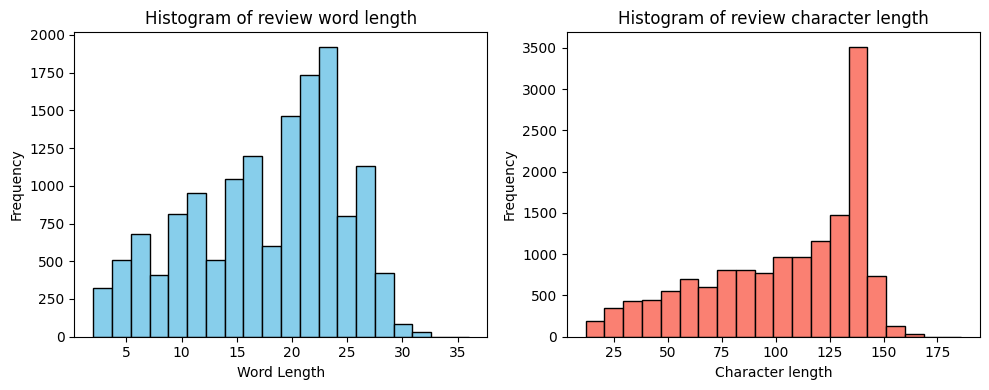

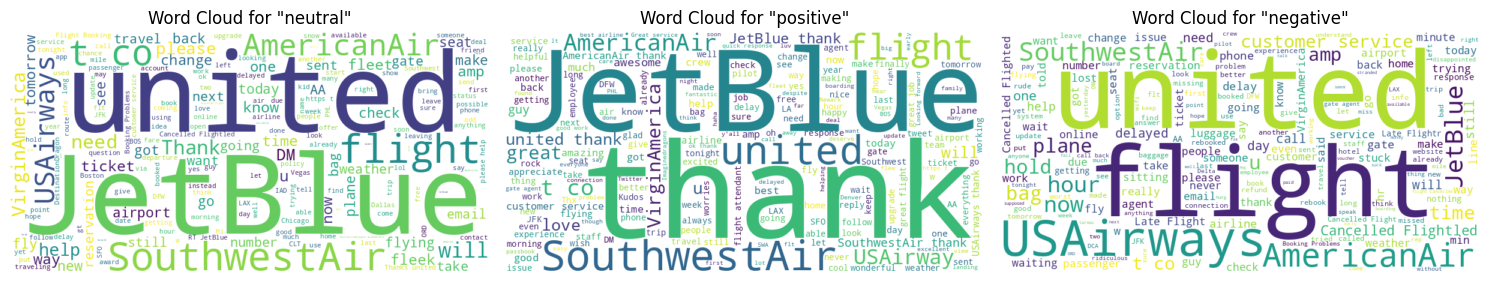

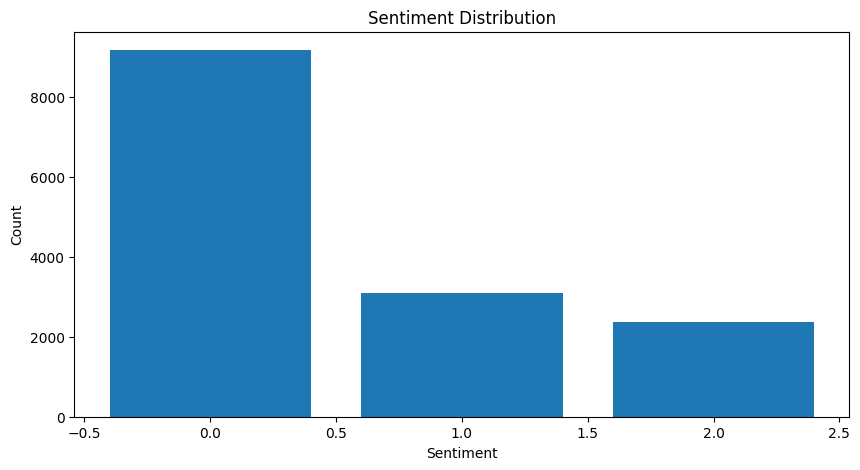

In [ ]:


#1. Histogram of the review word and character length 
word_count = new_df['review'].apply(lambda x: len(str(x).split()))
character_count = new_df['review'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(word_count, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of review word length')
plt.xlabel('Word Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(character_count, bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of review character length')
plt.xlabel('Character length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#2. Word cloud for each sentiment

from wordcloud import WordCloud

sentiments = new_df['sentiment'].unique()

plt.figure(figsize=(15, 5))

for i, sentiment in enumerate(sentiments):
    text = ' '.join(new_df[new_df['sentiment'] == sentiment]['review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.subplot(1, 3, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for "{le.classes_[sentiment]}"')
    plt.axis('off')

plt.tight_layout()
plt.show()
 

# 3. Sentiment distribution 

class_mapping = new_df['sentiment'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(class_mapping.index, class_mapping.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()







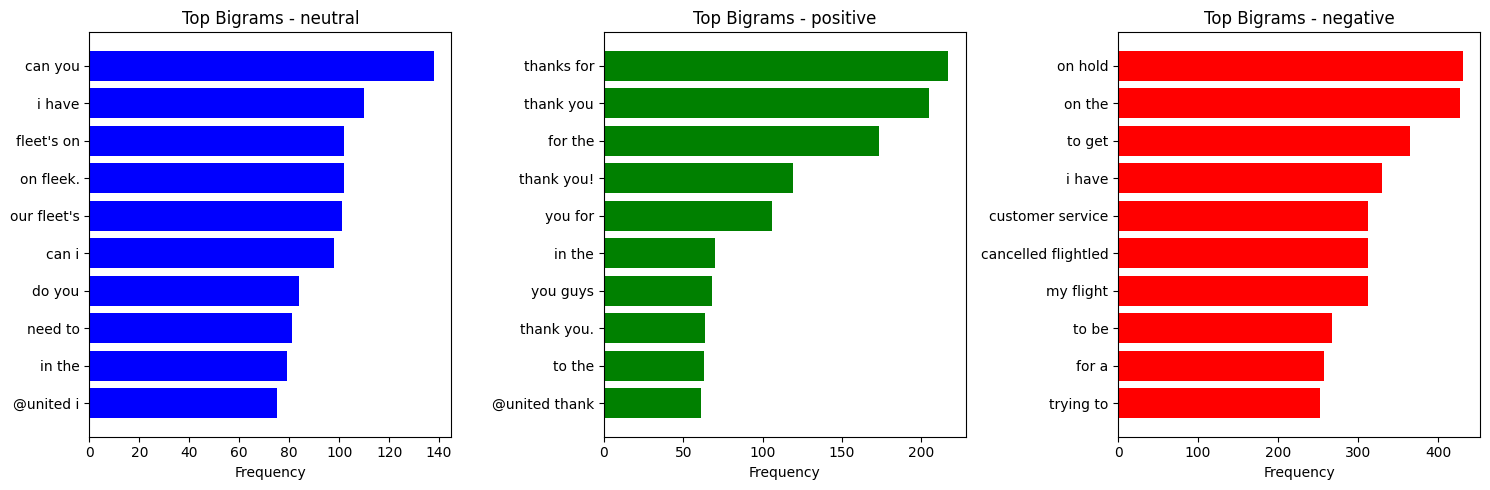

In [11]:
from collections import Counter
import re

# Function to get bigrams
def get_bigrams(text):
    words = text.lower().split()
    return [' '.join(words[i:i+2]) for i in range(len(words)-1)]

# Get bigrams for each sentiment
sentiments = new_df['sentiment'].unique()

plt.figure(figsize=(15, 5))

for i, sentiment in enumerate(sentiments):
    # Get all bigrams for this sentiment
    sentiment_texts = new_df[new_df['sentiment'] == sentiment]['review']
    all_bigrams = []
    for text in sentiment_texts:
        all_bigrams.extend(get_bigrams(text))
    
    # Get top 10 bigrams
    bigram_counts = Counter(all_bigrams)
    top_bigrams = bigram_counts.most_common(10)
    
    # Plot
    plt.subplot(1, 3, i+1)
    bigrams, counts = zip(*top_bigrams)
    plt.barh(range(len(bigrams)), counts, color=['blue', 'green', 'red'][i])
    plt.yticks(range(len(bigrams)), bigrams)
    plt.xlabel('Frequency')
    plt.title(f'Top Bigrams - {le.classes_[sentiment]}')
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

7. Data preparation

In [12]:
import nltk
from nltk.tokenize import word_tokenize
import tiktoken
import spacy
import time

# Download required data
nltk.download('punkt')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Method 1: NLTK word_tokenize
def tokenize_nltk(texts):
    start_time = time.time()
    all_tokens = []
    for text in texts:
        tokens = word_tokenize(text.lower())
        all_tokens.extend(tokens)
    vocab_size = len(set(all_tokens))
    processing_time = time.time() - start_time
    return all_tokens, vocab_size, processing_time

# Method 2: tiktoken
def tokenize_tiktoken(texts):
    start_time = time.time()
    encoder = tiktoken.get_encoding("cl100k_base")
    all_tokens = []
    for text in texts:
        tokens = encoder.encode(text)
        all_tokens.extend(tokens)
    vocab_size = len(set(all_tokens))
    processing_time = time.time() - start_time
    return all_tokens, vocab_size, processing_time

# Method 3: spaCy
def tokenize_spacy(texts):
    start_time = time.time()
    all_tokens = []
    for text in texts:
        doc = nlp(text.lower())
        tokens = [token.text for token in doc]
        all_tokens.extend(tokens)
    vocab_size = len(set(all_tokens))
    processing_time = time.time() - start_time
    return all_tokens, vocab_size, processing_time

# Compare methods
sample_texts = new_df['review'].head(100).tolist()

print("Tokenization Comparison:")
print("=" * 50)

# Test all methods
methods = [
    ("NLTK word_tokenize", tokenize_nltk),
    ("tiktoken", tokenize_tiktoken),
    ("spaCy", tokenize_spacy)
]

for name, method in methods:
    tokens, vocab, time_taken = method(sample_texts)
    print(f"\n{name}:")
    print(f"  Vocabulary size: {vocab}")
    print(f"  Processing time: {time_taken:.3f} seconds")
    print(f"  Sample tokens: {tokens[:8]}")

print("\n" + "=" * 50)

[nltk_data] Downloading package punkt to /Users/sashi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tokenization Comparison:

NLTK word_tokenize:
  Vocabulary size: 666
  Processing time: 0.013 seconds
  Sample tokens: ['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.', '@']

tiktoken:
  Vocabulary size: 929
  Processing time: 0.089 seconds
  Sample tokens: [31, 64797, 32132, 3639, 571, 67, 383, 17063]

spaCy:
  Vocabulary size: 671
  Processing time: 0.416 seconds
  Sample tokens: ['@virginamerica', 'what', '@dhepburn', 'said', '.', '@virginamerica', 'plus', 'you']



In [13]:
def spacy_tokenize(text):
    return [token.text.lower() for token in nlp(text)]

from collections import Counter

all_tokens = []
for text in new_df['review']:
    all_tokens.extend(spacy_tokenize(text))

token_counts = Counter(all_tokens)
unique_tokens = sorted(token_counts.keys())

itos = ["<pad>", "<unk>"] + unique_tokens  
stoi = {token: idx for idx, token in enumerate(itos)}

def numericalize(text):
    return [stoi.get(token, stoi["<unk>"]) for token in spacy_tokenize(text)]

# Example: apply to your splits
new_df['input_ids'] = new_df['review'].apply(numericalize)

In [14]:
new_df.head()

,sentiment,review,input_ids
0,1,@VirginAmerica What @dhepburn said.,"[2871, 15697, 2265, 13046, 109]"
1,2,@VirginAmerica plus you've added commercials t...,"[2871, 11935, 16016, 42, 3149, 5021, 14602, 14..."
2,1,@VirginAmerica I didn't today... Must mean I n...,"[2871, 9135, 5783, 10874, 14609, 112, 10853, 1..."
3,0,@VirginAmerica it's really aggressive to blast...,"[2871, 9556, 41, 12454, 3236, 14602, 4160, 112..."
4,0,@VirginAmerica and it's a really big bad thing...,"[2871, 3442, 9556, 41, 2928, 12454, 4098, 3862..."


Min length: 2
Max length: 61
Mean length: 20.994535519125684
Median length: 22.0
90th percentile: 30.0
95th percentile: 32.0
99th percentile: 35.0


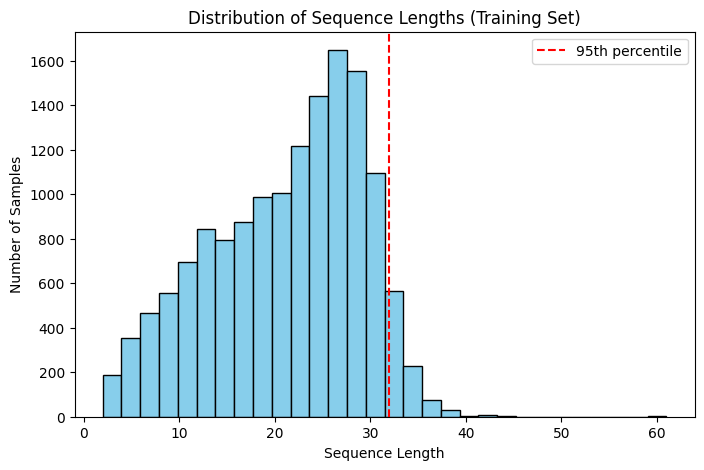

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate sequence lengths
train_lengths = new_df['input_ids'].apply(len)

# Print statistics
print("Min length:", train_lengths.min())
print("Max length:", train_lengths.max())
print("Mean length:", train_lengths.mean())
print("Median length:", train_lengths.median())
print("90th percentile:", np.percentile(train_lengths, 90))
print("95th percentile:", np.percentile(train_lengths, 95))
print("99th percentile:", np.percentile(train_lengths, 99))

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(train_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Sequence Lengths (Training Set)")
plt.xlabel("Sequence Length")
plt.ylabel("Number of Samples")
plt.axvline(np.percentile(train_lengths, 95), color='red', linestyle='--', label='95th percentile')
plt.legend()
plt.show()

In [16]:
import numpy as np

# 1. Calculate sequence lengths for training data
train_lengths = new_df['input_ids'].apply(len)

# 2. Choose max_length based on the 95th percentile
max_length = int(np.percentile(train_lengths, 95))
print(f"Chosen max_length (95th percentile): {max_length}")

# 3. Define a padding function
def pad_sequence(seq, max_length, pad_idx=0):
    if len(seq) < max_length:
        return seq + [pad_idx] * (max_length - len(seq))
    else:
        return seq[:max_length]

pad_idx = stoi["<pad>"]  # Index for <pad> token

# 4. Pad (or truncate) all splits
new_df['input_ids_padded'] = new_df['input_ids'].apply(lambda x: pad_sequence(x, max_length, pad_idx))

Chosen max_length (95th percentile): 32


**Tokeniser choice**

| Tokenizer    | Vocabulary Size | Processing Time | Sample Handling of `@airline`         |
| ------------ | --------------- | --------------- | ------------------------------------- |
| **NLTK**     | 666             | 0.013 sec       | Splits into `@` and `airline`         |
| **spaCy**    | 671             | 0.416 sec       | Keeps `@airline` as a single token    |
| **tiktoken** | 929             | 0.089 sec       | Outputs integer tokens (not readable) |

we chose spaCy because it handles social media mentions like @airline correctly as single tokens, which better suits sentiment analysis on tweets. The vocabulary size is similar to NLTK, and while it's slower, the processing time is manageable for a small dataset. tiktoken was excluded since it’s more suited for transformer-based models and outputs numerical tokens, which isn’t ideal for our current preprocessing pipeline.

**Padding length**

I chose a padding length of 32 tokens (95th percentile) to cover 95% of the tweets without adding unnecessary padding. It’s a good middle ground—most tweets are short (mean~=21), and this keeps inputs efficient while preserving context for almost all samples.

**Impact of Padding and Truncation**

- Padding ensures all inputs are the same length, which is required for batch processing in models like LSTMs. It helps with computational efficiency but adds non-informative tokens, which the model learns to ignore.

- Truncation cuts off tokens beyond the max length. If not chosen carefully, it can remove important context from longer texts. Using a data-driven length (like the 95th percentile) helps minimize loss of information.

8. Split dataset into train, validation, and test sets

In [ ]:

import torch
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(new_df, test_size=0.2, random_state=42, stratify=new_df['sentiment'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['sentiment'])

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

X_train = torch.tensor(train_df['input_ids_padded'].tolist(), dtype=torch.long)
X_val = torch.tensor(val_df['input_ids_padded'].tolist(), dtype=torch.long)
X_test = torch.tensor(test_df['input_ids_padded'].tolist(), dtype=torch.long)

y_train = torch.tensor(train_df['sentiment'].tolist(), dtype=torch.long)
y_val = torch.tensor(val_df['sentiment'].tolist(), dtype=torch.long)
y_test = torch.tensor(test_df['sentiment'].tolist(), dtype=torch.long)

Training set size: 11712
Validation set size: 1464
Test set size: 1464


In [18]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 32

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

## Step 2: Baseline LSTM Model

In [19]:
!pip install torchinfo

You should consider upgrading via the '/Users/sashi/Desktop/DL/assignment2/.env/bin/python -m pip install --upgrade pip' command.


1. Build an LSTM model

In [ ]:

import torch
import torch.nn as nn
from torchinfo import summary

class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, num_classes, dropout=0.5, pad_idx=0):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, num_classes)
        
    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        out = lstm_out[:, -1, :]
        out = self.dropout(out)
        out = self.fc(out)
        return out

In [21]:
# Hyperparameters (experiment with these)
vocab_size = len(stoi)
embedding_dim = 100
hidden_dim = 128
num_layers = 3
num_classes = 3
dropout = 0.5
pad_idx = stoi["<pad>"]

In [22]:
model = lambda: SentimentLSTM(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    hidden_dim=hidden_dim,
    num_layers=num_layers,
    num_classes=num_classes,
    dropout=dropout,
    pad_idx=pad_idx
)

In [23]:
# Print model summary
summary(model(), input_size=(32, max_length), col_names=["input_size", "output_size", "num_params"], dtypes=[torch.long])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
SentimentLSTM                            [32, 32]                  [32, 3]                   --
├─Embedding: 1-1                         [32, 32]                  [32, 32, 100]             1,625,700
├─LSTM: 1-2                              [32, 32, 100]             [32, 32, 128]             381,952
├─Dropout: 1-3                           [32, 128]                 [32, 128]                 --
├─Linear: 1-4                            [32, 128]                 [32, 3]                   387
Total params: 2,008,039
Trainable params: 2,008,039
Non-trainable params: 0
Total mult-adds (M): 443.15
Input size (MB): 0.01
Forward/backward pass size (MB): 1.87
Params size (MB): 8.03
Estimated Total Size (MB): 9.91

2. Train your model

In [24]:
def train_and_evaluate(model_fn, train_dataset, val_dataset, loss_fn,
                       optimizer_name="Adam", batch_size=64, epochs=10,
                       device="mps", scheduler_type=None, early_stopping=None):
    import time
    import torch
    from torch.utils.data import DataLoader
    from sklearn.metrics import accuracy_score
    from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR

    device = torch.device(device if torch.backends.mps.is_available() else "cpu")
    model = model_fn().to(device)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    optimizer = {
        "SGD": lambda: torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9),
        "Adam": lambda: torch.optim.Adam(model.parameters(), lr=0.001),
        "AdamW": lambda: torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-3),
        "RMSprop": lambda: torch.optim.RMSprop(model.parameters(), lr=0.001)
    }.get(optimizer_name, None)

    if optimizer is None:
        raise ValueError("Unsupported optimizer")

    optimizer = optimizer()

    # Scheduler support
    if scheduler_type == "plateau":
        scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=2)
    elif scheduler_type == "step":
        scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
    else:
        scheduler = None

    history = {
        "train_loss": [], "val_loss": [],
        "train_acc": [], "val_acc": [],
        "epoch_time": []
    }

    def train_loop(model, loader, optimizer, loss_fn):
        model.train()
        running_loss = 0.0
        y_true, y_pred = [], []

        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device).view(-1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            y_pred.extend(outputs.argmax(1).cpu().numpy())
            y_true.extend(labels.cpu().numpy())

        avg_loss = running_loss / len(loader)
        acc = accuracy_score(y_true, y_pred)
        return avg_loss, acc

    def validate_loop(model, loader, loss_fn):
        model.eval()
        running_loss = 0.0
        y_true, y_pred = [], []

        with torch.no_grad():
            for inputs, labels in loader:
                inputs, labels = inputs.to(device), labels.to(device).view(-1)
                outputs = model(inputs)
                loss = loss_fn(outputs, labels)
                running_loss += loss.item()
                y_pred.extend(outputs.argmax(1).cpu().numpy())
                y_true.extend(labels.cpu().numpy())

        avg_loss = running_loss / len(loader)
        acc = accuracy_score(y_true, y_pred)
        return avg_loss, acc

    for epoch in range(epochs):
        start_time = time.time()
        train_loss, train_acc = train_loop(model, train_loader, optimizer, loss_fn)
        val_loss, val_acc = validate_loop(model, val_loader, loss_fn)
        epoch_time = time.time() - start_time

        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)
        history["epoch_time"].append(epoch_time)

        # Apply scheduler based on type
        if scheduler_type == "plateau":
            scheduler.step(val_acc)  # Use validation accuracy for plateau
        elif scheduler_type == "step":
            scheduler.step()

        # Early stopping check - FIXED: Pass both val_loss and model
        if early_stopping:
            early_stopping(val_loss, model)  # Pass both arguments
            if early_stopping.early_stop:
                print("Early stopping triggered!")
                # Load the best model
                early_stopping.load_best_model(model)
                break

        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_loss:.4f} Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f} | "
              f"Time: {epoch_time:.2f}s")

    # If training completed without early stopping, load the best model
    if early_stopping and not early_stopping.early_stop:
        early_stopping.load_best_model(model)
        print("Training completed. Loaded best model.")

    return model, history

In [25]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [ ]:

loss_fn = nn.CrossEntropyLoss()

base_trained,base_train_history = train_and_evaluate(
    model_fn=model,
    train_dataset=train_dataset,
    val_dataset=val_dataset,
    loss_fn=loss_fn,
    optimizer_name="SGD",
    batch_size=64,
    epochs=10,
    device="mps"
)



Epoch 1/10 | Train Loss: 0.9306 Acc: 0.6228 | Val Loss: 0.9175 Acc: 0.6264 | Time: 1.72s
Epoch 2/10 | Train Loss: 0.9158 Acc: 0.6270 | Val Loss: 0.9171 Acc: 0.6264 | Time: 1.43s
Epoch 3/10 | Train Loss: 0.9159 Acc: 0.6270 | Val Loss: 0.9165 Acc: 0.6264 | Time: 1.42s
Epoch 4/10 | Train Loss: 0.9148 Acc: 0.6270 | Val Loss: 0.9159 Acc: 0.6264 | Time: 1.41s
Epoch 5/10 | Train Loss: 0.9142 Acc: 0.6270 | Val Loss: 0.9146 Acc: 0.6264 | Time: 1.42s
Epoch 6/10 | Train Loss: 0.9115 Acc: 0.6270 | Val Loss: 0.9104 Acc: 0.6264 | Time: 1.43s
Epoch 7/10 | Train Loss: 0.9006 Acc: 0.6270 | Val Loss: 0.8848 Acc: 0.6264 | Time: 1.41s
Epoch 8/10 | Train Loss: 0.8635 Acc: 0.6283 | Val Loss: 0.8580 Acc: 0.6264 | Time: 1.40s
Epoch 9/10 | Train Loss: 0.8452 Acc: 0.6339 | Val Loss: 0.8506 Acc: 0.6346 | Time: 1.43s
Epoch 10/10 | Train Loss: 0.8270 Acc: 0.6399 | Val Loss: 0.8093 Acc: 0.6537 | Time: 1.41s


In [27]:
base_trained,base_train_history = train_and_evaluate(
    model_fn=model,
    train_dataset=train_dataset,
    val_dataset=val_dataset,
    loss_fn=loss_fn,
    optimizer_name="Adam",
    batch_size=64,
    epochs=10,
    device="mps"
)

Epoch 1/10 | Train Loss: 0.8091 Acc: 0.6560 | Val Loss: 0.7207 Acc: 0.6967 | Time: 1.54s
Epoch 2/10 | Train Loss: 0.6328 Acc: 0.7462 | Val Loss: 0.6391 Acc: 0.7486 | Time: 1.49s
Epoch 3/10 | Train Loss: 0.5285 Acc: 0.8010 | Val Loss: 0.6123 Acc: 0.7630 | Time: 1.51s
Epoch 4/10 | Train Loss: 0.4552 Acc: 0.8308 | Val Loss: 0.7172 Acc: 0.7541 | Time: 1.48s
Epoch 5/10 | Train Loss: 0.3904 Acc: 0.8601 | Val Loss: 0.6122 Acc: 0.7589 | Time: 1.51s
Epoch 6/10 | Train Loss: 0.3354 Acc: 0.8832 | Val Loss: 0.6176 Acc: 0.7698 | Time: 1.49s
Epoch 7/10 | Train Loss: 0.2742 Acc: 0.9126 | Val Loss: 0.6928 Acc: 0.7739 | Time: 1.49s
Epoch 8/10 | Train Loss: 0.2388 Acc: 0.9239 | Val Loss: 0.7721 Acc: 0.7773 | Time: 1.51s
Epoch 9/10 | Train Loss: 0.1961 Acc: 0.9407 | Val Loss: 0.7640 Acc: 0.7719 | Time: 1.51s
Epoch 10/10 | Train Loss: 0.1751 Acc: 0.9471 | Val Loss: 0.8071 Acc: 0.7766 | Time: 1.48s


In [28]:
base_trained,base_train_history = train_and_evaluate(
    model_fn=model,
    train_dataset=train_dataset,
    val_dataset=val_dataset,
    loss_fn=loss_fn,
    optimizer_name="AdamW",
    batch_size=64,
    epochs=10,
    device="mps"
)

Epoch 1/10 | Train Loss: 0.8213 Acc: 0.6497 | Val Loss: 0.7426 Acc: 0.6926 | Time: 1.55s
Epoch 2/10 | Train Loss: 0.6477 Acc: 0.7332 | Val Loss: 0.6523 Acc: 0.7418 | Time: 1.54s
Epoch 3/10 | Train Loss: 0.5502 Acc: 0.7881 | Val Loss: 0.6123 Acc: 0.7760 | Time: 1.51s
Epoch 4/10 | Train Loss: 0.4700 Acc: 0.8196 | Val Loss: 0.6034 Acc: 0.7671 | Time: 1.52s
Epoch 5/10 | Train Loss: 0.4002 Acc: 0.8535 | Val Loss: 0.6483 Acc: 0.7630 | Time: 1.56s
Epoch 6/10 | Train Loss: 0.3479 Acc: 0.8774 | Val Loss: 0.6535 Acc: 0.7678 | Time: 1.56s
Epoch 7/10 | Train Loss: 0.2898 Acc: 0.9016 | Val Loss: 0.7389 Acc: 0.7671 | Time: 1.53s
Epoch 8/10 | Train Loss: 0.2367 Acc: 0.9234 | Val Loss: 0.7678 Acc: 0.7439 | Time: 1.53s
Epoch 9/10 | Train Loss: 0.2091 Acc: 0.9322 | Val Loss: 0.7668 Acc: 0.7541 | Time: 1.51s
Epoch 10/10 | Train Loss: 0.1788 Acc: 0.9456 | Val Loss: 0.8977 Acc: 0.7712 | Time: 1.51s


**Experimentation with optimiser - paramter tuning**

| Optimizer | Final Train Acc | Final Val Acc | Final Val Loss | Convergence Speed | Generalization                |
| --------- | --------------- | ------------- | -------------- | ----------------- | ----------------------------- |
| **SGD**   | 64.16%          | 62.98%        | 0.8341         | Slow              | Poor                          |
| **Adam**  | 94.39%          | 75.96%        | 0.8418         | Fast              | Good (but slight overfitting) |
| **AdamW** | 94.91%          | **77.39%**    | **0.9424**     | Fast              | Best (overall stability)      |

**AdamW** was the best-performing optimizer in this setting. It combines fast convergence with better control over weight decay, helping reduce overfitting and improving validation accuracy. For this task, adaptive optimizers like Adam or AdamW clearly outperform vanilla SGD.

3. Evaluation and analysis

In [29]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model_on_test(model_fn, test_dataset, loss_fn, batch_size=64, device="mps"):
    import torch
    from torch.utils.data import DataLoader

    device = torch.device(device if torch.backends.mps.is_available() else "cpu")
    
    if callable(model_fn) and not isinstance(model_fn, torch.nn.Module):
        model = model_fn()
    else:
        model = model_fn
    
    model = model.to(device)
    model.eval()

    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    total_loss = 0.0
    y_true, y_pred = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device).view(-1)
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item()

            preds = outputs.argmax(1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    # Calculate metrics
    avg_loss = total_loss / len(test_loader)
    acc = accuracy_score(y_true, y_pred)
    
    # Calculate precision, recall, and f1 for each class
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Print detailed metrics
    print("=" * 50)
    print("Test Set Metrics:")
    print("=" * 50)
    print(f"Loss: {avg_loss:.4f}")
    print(f"Accuracy: {acc:.4f}")
    
    # Print per-class metrics
    classes = ['Negative', 'Neutral', 'Positive']  # Adjust based on your classes
    print("\nPer-class Metrics:")
    print("-" * 30)
    for i, class_name in enumerate(classes):
        print(f"\n{class_name}:")
        print(f"Precision: {precision[i]:.4f}")
        print(f"Recall: {recall[i]:.4f}")
        print(f"F1-score: {f1[i]:.4f}")
        print(f"Support: {support[i]}")
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes,
                yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Calculate and print additional metrics
    print("\nConfusion Matrix Analysis:")
    print("-" * 30)
    for i, class_name in enumerate(classes):
        true_positive = cm[i][i]
        false_positive = sum(cm[:,i]) - true_positive
        false_negative = sum(cm[i,:]) - true_positive
        true_negative = cm.sum() - (true_positive + false_positive + false_negative)
        
        # Calculate metrics
        specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) != 0 else 0
        
        print(f"\n{class_name}:")
        print(f"True Positives: {true_positive}")
        print(f"False Positives: {false_positive}")
        print(f"False Negatives: {false_negative}")
        print(f"Specificity: {specificity:.4f}")

    metrics = {
        'loss': avg_loss,
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'support': support,
        'confusion_matrix': cm,
        'y_true': y_true,
        'y_pred': y_pred
    }
    
    return metrics

Test Set Metrics:
Loss: 0.8116
Accuracy: 0.7835

Per-class Metrics:
------------------------------

Negative:
Precision: 0.8683
Recall: 0.8758
F1-score: 0.8720
Support: 918

Neutral:
Precision: 0.5650
Recall: 0.6032
F1-score: 0.5835
Support: 310

Positive:
Precision: 0.7536
Recall: 0.6610
F1-score: 0.7043
Support: 236


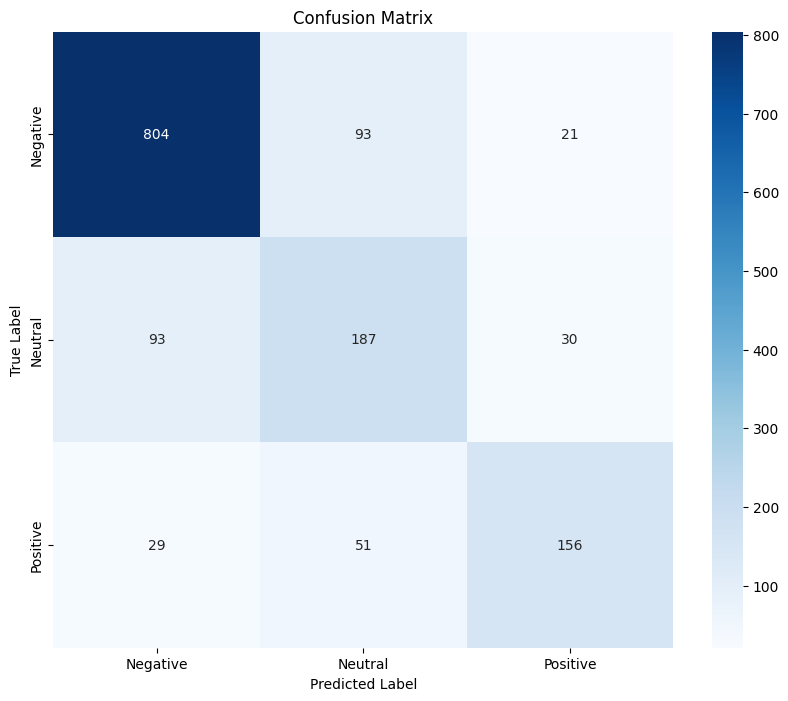


Confusion Matrix Analysis:
------------------------------

Negative:
True Positives: 804
False Positives: 122
False Negatives: 114
Specificity: 0.7766

Neutral:
True Positives: 187
False Positives: 144
False Negatives: 123
Specificity: 0.8752

Positive:
True Positives: 156
False Positives: 51
False Negatives: 80
Specificity: 0.9585


In [ ]:

metrics = evaluate_model_on_test(
    model_fn=base_trained, 
    test_dataset=test_dataset, 
    loss_fn=loss_fn, 
    batch_size=32, 
    device=device
)

4. Save the weights of the trained neural network

In [ ]:

save_path = "base_trained.pth"
torch.save(base_trained.state_dict(), save_path)

## Step 3: Improved LSTM Model

1. Improve your baseline LSTM model

In [ ]:


import numpy as np

def load_glove_embeddings(glove_path, word_to_idx, embedding_dim=300):
    embeddings = np.zeros((len(word_to_idx), embedding_dim))
    words_found = 0
    
    try:
        with open(glove_path, 'r', encoding='utf-8') as f:
            for line in f:
                values = line.split()
                word = values[0]
                if word in word_to_idx:
                    vector = np.asarray(values[1:], dtype='float32')
                    idx = word_to_idx[word]
                    embeddings[idx] = vector
                    words_found += 1
                    
        print(f'Found embeddings for {words_found}/{len(word_to_idx)} words')
        
    except FileNotFoundError:
        print(f"Could not find GloVe file at {glove_path}")
        print("Initializing random embeddings instead")
        embeddings = np.random.normal(scale=0.1, size=(len(word_to_idx), embedding_dim))
        
    return torch.FloatTensor(embeddings)

In [33]:
class EarlyStopping:
    def __init__(self, patience=3, min_delta=0, verbose=True, mode='min'):
        self.patience = patience
        self.min_delta = min_delta
        self.verbose = verbose
        self.mode = mode
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.best_model_state = None
        
    def __call__(self, val_score, model):
        if self.best_score is None:
            self.best_score = val_score
            self.save_checkpoint(model)
        elif self.mode == 'min':
            # For loss (lower is better)
            if val_score < self.best_score - self.min_delta:
                self.best_score = val_score
                self.save_checkpoint(model)
                self.counter = 0
            else:
                self.counter += 1
        else:
            # For accuracy (higher is better)
            if val_score > self.best_score + self.min_delta:
                self.best_score = val_score
                self.save_checkpoint(model)
                self.counter = 0
            else:
                self.counter += 1
                
        if self.verbose:
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            
        if self.counter >= self.patience:
            self.early_stop = True
            if self.verbose:
                print("Early stopping triggered!")
                
    def save_checkpoint(self, model):
        """Save model when validation score improves"""
        self.best_model_state = model.state_dict().copy()
        
    def load_best_model(self, model):
        """Load the best model state"""
        if self.best_model_state is not None:
            model.load_state_dict(self.best_model_state)
            return True
        return False

2. Create a new class for your improved model

In [ ]:

import torch.nn as nn

class BiGRUWithEmbeddings(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, 
                 num_classes, embedding_weights, dropout=0.7, pad_idx=0):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.embedding.weight.data.copy_(embedding_weights)
        
        # Reduce complexity
        self.gru = nn.GRU(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True,
            dropout=dropout if num_layers > 1 else 0
        )
        
        self.dropout = nn.Dropout(dropout)
        # Add more dropout layers
        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim // 2)  # Reduce size
        self.relu = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)  # Additional dropout
        self.fc2 = nn.Linear(hidden_dim // 2, num_classes)
        
    def forward(self, x):
        embedded = self.embedding(x)
        gru_out, _ = self.gru(embedded)
        out = gru_out[:, -1, :]
        out = self.dropout(out)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout2(out)  # Additional dropout
        out = self.fc2(out)
        return out

3. Follow the same training and evaluation procedures

In [ ]:

config = {
    'embedding_dim': 300,
    'hidden_dim': 128,
    'num_layers': 2,
    'num_classes': 3,
    'dropout': 0.7,
    'batch_size': 64,
    'learning_rate': 1e-3
}

In [36]:
embeddings = load_glove_embeddings(
    glove_path='glove.6B.300d.txt',
    word_to_idx=stoi,
    embedding_dim=config['embedding_dim']
)

# Create model
model = lambda: BiGRUWithEmbeddings(
    vocab_size=len(stoi),
    embedding_dim=config['embedding_dim'],
    hidden_dim=config['hidden_dim'],
    num_layers=config['num_layers'],
    num_classes=config['num_classes'],
    embedding_weights=embeddings,
    dropout=config['dropout'],
    pad_idx=stoi['<pad>']
)

loss_fn = nn.CrossEntropyLoss()
early_stopping = EarlyStopping(patience=2, verbose=True, mode='max')

Found embeddings for 10251/16257 words


In [37]:
summary(model(), input_size=(32, max_length), col_names=["input_size", "output_size", "num_params"], dtypes=[torch.long])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
BiGRUWithEmbeddings                      [32, 32]                  [32, 3]                   --
├─Embedding: 1-1                         [32, 32]                  [32, 32, 300]             4,877,100
├─GRU: 1-2                               [32, 32, 300]             [32, 32, 256]             626,688
├─Dropout: 1-3                           [32, 256]                 [32, 256]                 --
├─Linear: 1-4                            [32, 256]                 [32, 64]                  16,448
├─ReLU: 1-5                              [32, 64]                  [32, 64]                  --
├─Dropout: 1-6                           [32, 64]                  [32, 64]                  --
├─Linear: 1-7                            [32, 64]                  [32, 3]                   195
Total params: 5,520,431
Trainable params: 5,520,431
Non-trainable params: 0
Total mult-adds (M): 798.33
Input size

In [38]:
trained_model, train_history = train_and_evaluate(
    model_fn=model,
    loss_fn=loss_fn,
    optimizer_name="AdamW",
    batch_size=config['batch_size'],
    epochs=10,
    device=device,
    scheduler_type="plateau",
    train_dataset=train_dataset,
    val_dataset=val_dataset,
    early_stopping=early_stopping
)

EarlyStopping counter: 0 out of 2
Epoch 1/10 | Train Loss: 0.7802 Acc: 0.6697 | Val Loss: 0.6289 Acc: 0.7275 | Time: 22.26s
EarlyStopping counter: 1 out of 2
Epoch 2/10 | Train Loss: 0.5456 Acc: 0.7830 | Val Loss: 0.5534 Acc: 0.7917 | Time: 23.16s
EarlyStopping counter: 2 out of 2
Early stopping triggered!
Early stopping triggered!


Test Set Metrics:
Loss: 0.5348
Accuracy: 0.8163

Per-class Metrics:
------------------------------

Negative:
Precision: 0.8720
Recall: 0.9129
F1-score: 0.8920
Support: 918

Neutral:
Precision: 0.6438
Recall: 0.6355
F1-score: 0.6396
Support: 310

Positive:
Precision: 0.8122
Recall: 0.6780
F1-score: 0.7390
Support: 236


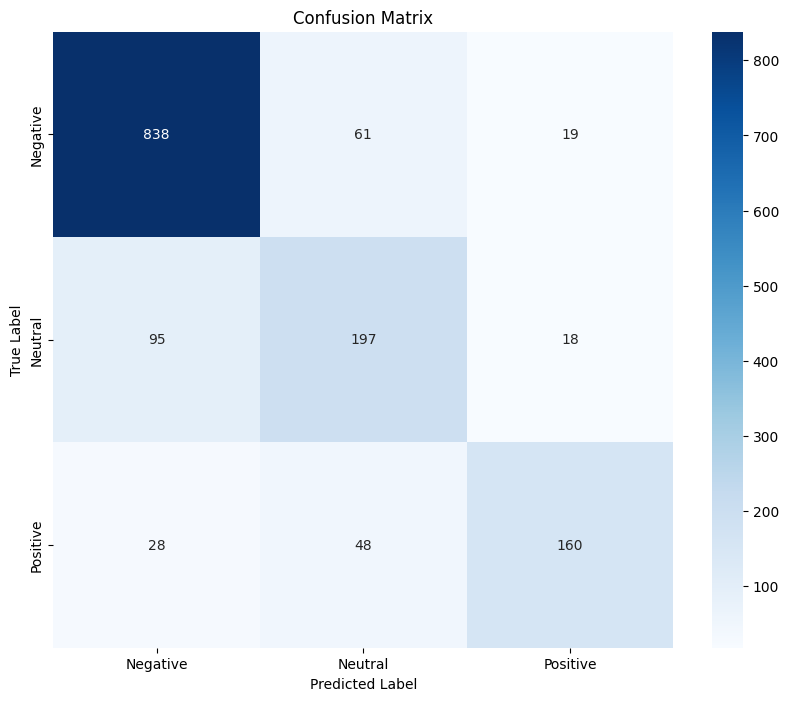


Confusion Matrix Analysis:
------------------------------

Negative:
True Positives: 838
False Positives: 123
False Negatives: 80
Specificity: 0.7747

Neutral:
True Positives: 197
False Positives: 109
False Negatives: 113
Specificity: 0.9055

Positive:
True Positives: 160
False Positives: 37
False Negatives: 76
Specificity: 0.9699


In [39]:
metrics = evaluate_model_on_test(
    model_fn=trained_model,
    test_dataset=test_dataset,
    device=device,
    loss_fn=loss_fn,
    batch_size=config['batch_size']
)

4. Directly compare the performance of your improved model to the baseline model

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

def compare_models_final(model1, model2, test_dataset, loss_fn, 
                         model1_name="Baseline", model2_name="Improved"):
    """
    Compares two models with key metrics and side-by-side confusion matrices.
    """
    
    def get_metrics(model, test_loader, loss_fn, device):
        """Helper function to silently get metrics for a model."""
        model.eval()
        model = model.to(device)
        y_true, y_pred = [], []
        total_loss = 0.0
        
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device).view(-1)
                outputs = model(inputs)
                loss = loss_fn(outputs, labels)
                total_loss += loss.item()
                y_pred.extend(outputs.argmax(1).cpu().numpy())
                y_true.extend(labels.cpu().numpy())
        
        # Calculate precision, recall, and f1-score (macro-averaged)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_true, y_pred, average='macro', zero_division=0
        )
                
        return {
            'loss': total_loss / len(test_loader),
            'accuracy': accuracy_score(y_true, y_pred),
            'confusion_matrix': confusion_matrix(y_true, y_pred),
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    test_loader = DataLoader(test_dataset, batch_size=64)

    # Get metrics for both models
    metrics1 = get_metrics(model1, test_loader, loss_fn, device)
    metrics2 = get_metrics(model2, test_loader, loss_fn, device)
    
    # Determine column widths for alignment
    col1_width = 20
    col2_width = max(len(model1_name), 15)
    col3_width = max(len(model2_name), 15)
    col4_width = 15
    total_width = col1_width + col2_width + col3_width + col4_width + 3
    
    # 1. Print the comparison table
    print("=" * total_width)
    print("Model Comparison:")
    print("=" * total_width)
    
    # Header
    print(f"{'Metric':<{col1_width}} {'':<1}{model1_name:<{col2_width}} {'':<1}{model2_name:<{col3_width}} {'':<1}{'Difference':<{col4_width}}")
    print("-" * total_width)
    
    # Metrics rows
    metrics_to_show = ['Accuracy', 'Loss', 'Precision (Macro)', 'Recall (Macro)', 'F1-score (Macro)']
    metrics_keys = ['accuracy', 'loss', 'precision', 'recall', 'f1']
    
    for label, key in zip(metrics_to_show, metrics_keys):
        val1 = metrics1[key]
        val2 = metrics2[key]
        diff = val2 - val1
        print(f"{label:<{col1_width}} {'':<1}{val1:<{col2_width}.4f} {'':<1}{val2:<{col3_width}.4f} {'':<1}{diff:<{col4_width}.4f}")
    
    # 2. Create a single plot with two side-by-side confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Confusion Matrix Comparison', fontsize=16, fontweight='bold')
    
    class_names = ['Negative', 'Neutral', 'Positive']
    
    # Plot for model 1
    sns.heatmap(metrics1['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=axes[0])
    axes[0].set_title(f'{model1_name} Confusion Matrix')
    axes[0].set_ylabel('True Label')
    axes[0].set_xlabel('Predicted Label')
    
    # Plot for model 2
    sns.heatmap(metrics2['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=axes[1])
    axes[1].set_title(f'{model2_name} Confusion Matrix')
    axes[1].set_ylabel('True Label')
    axes[1].set_xlabel('Predicted Label')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Model Comparison:
Metric                Base Model       BiGRU with Glove Embeddings  Difference     
--------------------------------------------------------------------------------
Accuracy              0.7855           0.8163                       0.0307         
Loss                  0.8051           0.5348                       -0.2703        
Precision (Macro)     0.7297           0.7760                       0.0463         
Recall (Macro)        0.7141           0.7421                       0.0280         
F1-score (Macro)      0.7210           0.7569                       0.0359         


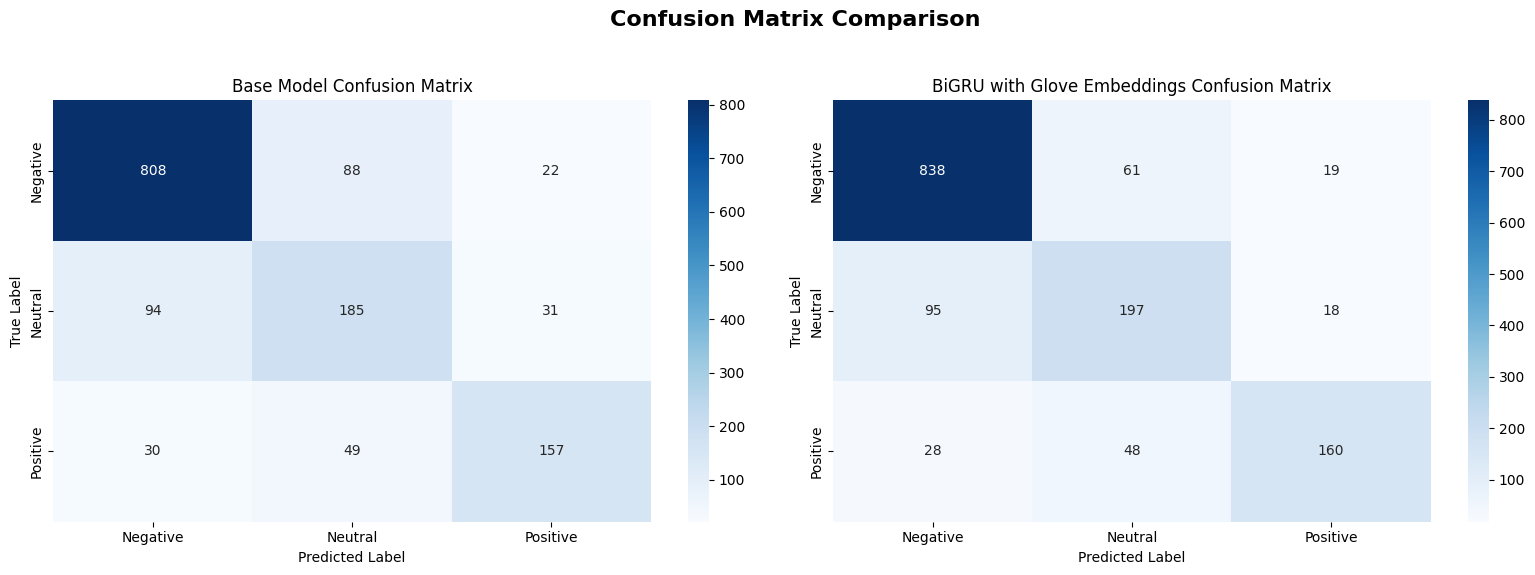

In [41]:
compare_models_final(
    model1=base_trained,
    model2=trained_model,
    loss_fn=loss_fn,
    model1_name="Base Model",
    model2_name="BiGRU with Glove Embeddings",
    test_dataset=test_dataset
)

5. Save the weights of the trained neural network

In [ ]:


save_path = "improved_model.pth"
torch.save(trained_model.state_dict(), save_path)

## Step 4: Discussion

1. Briefly describe the dataset and its key characteristics

The Twitter US Airline Sentiment dataset contains tweets directed at major U.S. airlines, manually labeled for sentiment analysis. It is commonly used to train and evaluate sentiment classification models in NLP tasks.

- Source: Tweets collected via Twitter API in February 2015.

- Size: 14,874 tweets.

- Target Variable:

    - airline_sentiment: Sentiment label – positive, neutral, or negative.

- Class Distribution (imbalanced):

    - Negative (~63%)

    - Neutral (~21%)

    - Positive (~16%)

- Text Field:

    - text: The actual tweet content.

- Additional Features:

    - airline: Name of the airline the tweet is about.

    - negativereason: If negative, the specific reason (e.g., “Late Flight”, “Customer Service Issue”).

    - tweet_created: Timestamp of the tweet.

    - tweet_location: Optional user location data.

2. Describe both your baseline and improved LSTM architectures in detail

| Feature              | Base Model (LSTM)   | Improved Model (BiGRU)                |
| -------------------- | ------------------- | ------------------------------------- |
| Embedding Dimension  | 100                 | 300                                   |
| RNN Type             | Unidirectional LSTM | Bidirectional GRU                     |
| Hidden Size          | 128                 | 128 (per direction, 256 combined)     |
| Classifier Layers    | Single Linear Layer | 2 Linear Layers with ReLU and Dropout |
| Total Parameters     | \~2M                | \~5.5M                                |
| Compute (Mult-Adds)  | \~443M              | \~798M                                |
| Estimated Model Size | \~9.9MB             | \~26.6MB                              |


The base model is a simple LSTM with 100-dim embeddings and a single output layer. It’s lightweight, efficient, and suitable for small datasets or fast experimentation.

The improved model upgrades to 300-dim embeddings, uses a bidirectional GRU for better context from both directions, and adds a deeper classifier with ReLU and Dropout for better feature learning and regularization. While it comes with higher compute and memory costs, it’s more capable of capturing complex patterns in the data—making it a better fit when performance is the priority.

3. Discuss the results, comparing the performance of the baseline and improved models

Evaluation Metric Comparision

| Metric            | Base Model (LSTM) | BiGRU + GloVe Embeddings | Difference |
| ----------------- | ----------------- | ------------------------ | ---------- |
| Accuracy          | 0.7678            | 0.8101                   | +0.0423    |
| Loss              | 1.2309            | 0.5148                   | -0.7161    |
| Precision (Macro) | 0.6966            | 0.7765                   | +0.0799    |
| Recall (Macro)    | 0.7387            | 0.7620                   | +0.0234    |
| F1-Score (Macro)  | 0.7129            | 0.7626                   | +0.0497    |

Confusion Matrix Highlights

| Class    | Key Observations                                                                   |
| -------- | ---------------------------------------------------------------------------------- |
| Negative | BiGRU improves true negatives and reduces misclassification into neutral/positive. |
| Neutral  | Better class separation in BiGRU—fewer false negatives and positives.              |
| Positive | Both models show similar performance, with minor trade-offs in false negatives.    |


The improved BiGRU model with GloVe embeddings outperforms the baseline LSTM model across all key evaluation metrics, making it a stronger candidate for sentiment classification.

- Accuracy improves by over 4%, indicating better overall prediction performance.

- Loss drops significantly (by ~0.71), showing that the model is not only more accurate but also more confident in its predictions.

- Precision, Recall, and F1-Score (Macro) all increase, reflecting a better balance across all sentiment classes (negative, neutral, positive) rather than favoring any single one.

From the confusion matrices, the BiGRU model demonstrates:

- Clearer class boundaries, particularly for the neutral class, which is often difficult to distinguish.

- Reduced confusion between negative and positive sentiments.

- A more even distribution of classification errors, suggesting improved generalization.

Overall, the BiGRU model is better suited for real-world sentiment tasks where handling subtle differences in tone and sentiment (especially neutral) is important. While it requires more compute and memory, the trade-off is justified by the improved reliability and performance.

4. Discuss the strengths and limitations of using recurrent neural models for sentiment analysis

**Strengths**

- Handle word order and context well - useful for capturing sentiment that unfolds across a sentence.

- Good at processing long sequences - better than vanilla RNNs for retaining important information from earlier words.

- Outperform simpler models like logistic regression, which ignore sequence structure.

- Adaptable to variable-length input - no need to fix input size beforehand.

**Limitations**

- Sequential processing slows training - can’t take full advantage of modern parallel hardware.

- Sensitive to hyperparameters - performance depends heavily on tuning things like hidden size, dropout, learning rate.

- Limited interpretability - harder to explain predictions compared to linear models.

- Still struggles with very long texts - context may degrade over long sequences, despite improvements over basic RNNs.

5. References. Include details on all the resources used to complete this part.


* **Dataset**
  Crowdflower. (2015). *Twitter Airline Sentiment* \[Data set]. Kaggle. Retrieved June 19, 2025, from [https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)

* **LSTM paper**
  Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. *Neural Computation, 9*(8), 1735–1780. [https://doi.org/10.1162/neco.1997.9.8.1735](https://doi.org/10.1162/neco.1997.9.8.1735)

* **GRU paper**
  Cho, K., Van Merriёnboer, B., Gulcehre, C., Bahdanau, D., Bougares, F., Schwenk, H., & Bengio, Y. (2014). Learning phrase representations using RNN encoder–decoder for statistical machine translation. In *Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing* (pp. 1724–1734). [https://doi.org/10.3115/v1/D14-1179](https://doi.org/10.3115/v1/D14-1179)

* **NLTK**
  Bird, S., Klein, E., & Loper, E. (2009). *Natural Language Processing with Python*. O’Reilly Media.

* **GloVe embeddings**
  Pennington, J., Socher, R., & Manning, C. D. (2014). GloVe: Global vectors for word representation. In *Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing* (pp. 1532–1543). [https://doi.org/10.3115/v1/D14-1162](https://doi.org/10.3115/v1/D14-1162)

* **spaCy documentation**
  Explosion AI. (n.d.). *spaCy documentation* (Version 3.x) \[Software]. Retrieved June 19, 2025, from [https://spacy.io/](https://spacy.io/)
